In [7]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv('../data/Chuvas/Chuvas18-21.csv')

In [3]:
data

,Código,Posto,Mês/Ano,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Acumulado
0,198,Abreu e Lima,jan./2018,0,0,0,0,0,0,0,...,"2,4","13,9",0,0,"0,2",0,"3,2",0,0,"6011,7"
1,309,Araçoiaba (Granja Cristo Redentor),jan./2018,0,0,0,0,0,0,0,...,"2,7","2,7","5,4","3,6",0,0,"2,5",0,0,4499
2,301,Cabo,jan./2018,0,0,0,0,0,0,0,...,"23,7","11,2",0,0,0,2,"6,1","1,8",0,"1285,7"
3,490,Cabo (Barragem de Gurjaú),jan./2018,0,0,0,0,0,0,0,...,"7,5","11,3","9,5",0,0,0,"5,6",0,1,"6762,5"
4,491,Cabo (Barragem de Suape),jan./2018,0,0,0,0,0,0,0,...,"23,7","15,1",0,0,0,0,0,"4,7",0,"6665,2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,451,Paulista,mai./2021,"1,6","7,7","0,2","63,7","25,8","8,5",0,...,-,-,-,-,-,-,-,-,-,"6159,6"
1144,265,Recife (Alto da Brasileira),mai./2021,"26,6",0,"6,4",0,"28,5","38,5","9,2",...,-,-,-,-,-,-,-,-,-,"5527,5"
1145,196,Recife (Codecipe / Santo Amaro),mai./2021,"21,6","2,6","1,5",32,110,"26,2",2,...,-,-,-,-,-,-,-,-,-,"6154,3"
1146,30,Recife (Várzea),mai./2021,"9,8","15,4","0,2","59,6","43,8","0,6","13,8",...,-,-,-,-,-,-,-,-,-,"6504,6"


In [4]:
data[['Posto', 'Mês/Ano', 'Acumulado']]

,Posto,Mês/Ano,Acumulado
0,Abreu e Lima,jan./2018,"6011,7"
1,Araçoiaba (Granja Cristo Redentor),jan./2018,4499
2,Cabo,jan./2018,"1285,7"
3,Cabo (Barragem de Gurjaú),jan./2018,"6762,5"
4,Cabo (Barragem de Suape),jan./2018,"6665,2"
...,...,...,...
1143,Paulista,mai./2021,"6159,6"
1144,Recife (Alto da Brasileira),mai./2021,"5527,5"
1145,Recife (Codecipe / Santo Amaro),mai./2021,"6154,3"
1146,Recife (Várzea),mai./2021,"6504,6"


In [ ]:
def plot_monthly_city_rainfall(df: pd.DataFrame, month_year: str):
    """
    Plota a chuva acumulada por cidade para um mês específico.

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame com as colunas:
            - 'Posto'      : nome da cidade ou estação
            - 'Mês/Ano'    : string no formato 'MM/YYYY'
            - 'Acumulado'  : chuva acumulada (mm) em cada leitura
    month_year : str
        Mês/Ano desejado no formato 'MM/YYYY' (ex.: '06/2025').

    Retorna
    -------
    matplotlib.figure.Figure
        Figura contendo o gráfico de barras.
    """
    # 1) Filtra o DataFrame para o mês/ano selecionado
    dados_filtrados = df.loc[df['Mês/Ano'] == month_year]

    # 2) Agrupa por cidade somando o total de chuva acumulada
    chuvas_por_cidade = (
        dados_filtrados
        .groupby('Posto', as_index=False)['Acumulado']
        .sum()
        .sort_values('Acumulado', ascending=False)  # ordena do maior pro menor (opcional)
    )

    # 3) Constrói o gráfico de barras
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(chuvas_por_cidade['Posto'], chuvas_por_cidade['Acumulado'])

    # 4) Ajustes de design
    ax.set_xlabel('Cidade')
    ax.set_ylabel('Chuva acumulada (mm)')
    ax.set_title(f'Chuva acumulada — {month_year}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return fig

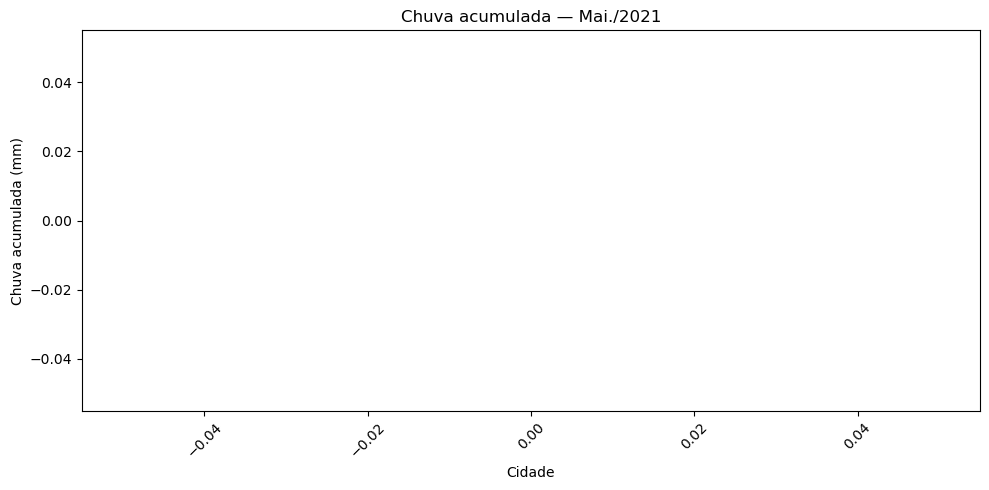

In [9]:
fig = plot_monthly_city_rainfall(data, "Mai./2021")
plt.show()